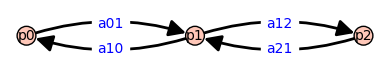

In [1]:
var('p0 p1 p2 a01 a10 a12 a21')
G=graphs.PathGraph(3).to_directed()
G.relabel({0:p0,1:p1,2:p2})
G.set_edge_label(p0,p1,a01)
G.set_edge_label(p1,p0,a10)
G.set_edge_label(p1,p2,a12)
G.set_edge_label(p2,p1,a21)
G.show(figsize=4,edge_labels=True)

In [2]:
A = G.weighted_adjacency_matrix()

In [3]:
L = diagonal_matrix(sum(A.T))-A
show(L)

[      a01      -a01         0]
[     -a10 a10 + a12      -a12]
[        0      -a21       a21]

In [4]:
sum(A.T) == sum(A.columns())

True

In [5]:
def generator(A):
    return A-diagonal_matrix(sum(A.T))

In [6]:
Q = generator(A)
show(Q)

[      -a01        a01          0]
[       a10 -a10 - a12        a12]
[         0        a21       -a21]

In [7]:
sum(Q.columns()) == sum(Q.T)

True

In [8]:
z0 = Q[[1,2],[1,2]].determinant().simplify_full()
z1 = Q[[0,2],[0,2]].determinant().simplify_full()
z2 = Q[[0,1],[0,1]].determinant().simplify_full()
print(f'[ {z0} : {z1} : {z2}]')

[ a10*a21 : a01*a21 : a01*a12]


In [9]:
zT = z0+z1+z2
p0 = z0/zT
p1 = z1/zT
p2 = z2/zT
show(table([[f'{p0=}'],[f'{p1=}'],[f'{p2=}']]))

p0=a10*a21/(a01*a12 + a01*a21 + a10*a21)
p1=a01*a21/(a01*a12 + a01*a21 + a10*a21)
p2=a01*a12/(a01*a12 + a01*a21 + a10*a21)


In [10]:
def hill_diagramatic_method(Q):
    n = Q.nrows()
    if Q.ncols() != n:
        raise ValueError
    z = [0]*n
    for i in range(n):
        a = [ j for j in range(n) ]
        a.remove(i)
        z[i] = Q[a,a].determinant().simplify_full()
    return z

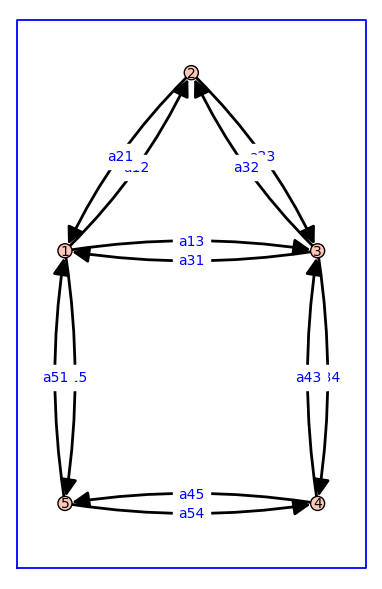

In [11]:
var('p1 p2 p3 p4 p5 a12 a21 a13 a31 a15 a51 a23 a32 a34 a43 a45 a54')
d = {1: {2:a12, 3:a13, 5:a15}, 2: {1:a21, 3:a23}, 3: {2:a32, 1:a31, 4:a34}, 4: {3:a43, 5:a45}, 5: {4:a54,1:a51}};
G = DiGraph(d,weighted=True)
vertex_positions = {1: (0, 0), 2: (1, 1.41), 3: (2, 0), 4: (2,-2), 5: (0,-2)}
G.plot(figsize=8,edge_labels=True,pos=vertex_positions,graph_border=True)

In [12]:
A = G.weighted_adjacency_matrix()
Q = generator(A)

In [13]:
z = hill_diagramatic_method(Q)
print(z)

[((a21 + a23)*a31 + a21*a32)*a43*a54 + (((a21 + a23)*a31 + a21*a32)*a43 + ((a21 + a23)*a31 + a21*a32 + (a21 + a23)*a34)*a45)*a51, (a12*a31 + (a12 + a13 + a15)*a32)*a43*a54 + ((a12*a31 + (a12 + a13)*a32)*a43 + (a12*a31 + (a12 + a13)*a32 + a12*a34)*a45)*a51, ((a13 + a15)*a21 + (a12 + a13 + a15)*a23)*a43*a54 + ((a13*a21 + (a12 + a13)*a23)*a43 + (a13*a21 + (a12 + a13)*a23)*a45)*a51, (a13*a21 + (a12 + a13)*a23)*a34*a51 + (a15*a21*a32 + (a15*a21 + a15*a23)*a31 + ((a13 + a15)*a21 + (a12 + a13 + a15)*a23)*a34)*a54, (a15*a21*a32 + (a15*a21 + a15*a23)*a31)*a43 + (a15*a21*a32 + (a15*a21 + a15*a23)*a31 + ((a13 + a15)*a21 + (a12 + a13 + a15)*a23)*a34)*a45]
